
# Image Classification with CNN


Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

------------

## Task

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

In [76]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline
import random

## The Data

**Download the fashion mnist dataset using Keras.**

In [77]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## Visualizing the Data

**Using matplotlib show an any image from the data set.**

In [78]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")  

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [79]:
X_train.shape,X_test.shape #2 dimentions

((60000, 28, 28), (10000, 28, 28))

In [80]:
y_train.shape,y_test.shape #1 dimentions

((60000,), (10000,))

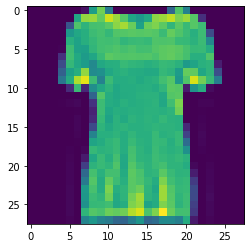

In [81]:
plt.imshow(X_train[10])

In [82]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [83]:
y_train[10]

0

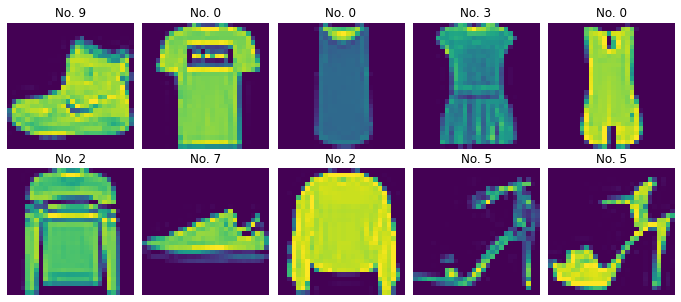

In [84]:
num_rows, num_cols = 2, 5                                                           #rastgele resimler seçtim yazdırdım
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.05, 'hspace':0.15}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index])
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

## Preprocessing the Data

**Normalize the X train and X test using max value of the image arrays.**

In [85]:
X_train[9].min()

0

In [86]:
X_train[9].max()

255

In [87]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255                               #255 e böldüğümüzde tüm pixeller 0 ile 1 arasında değer alıyor 
X_test /= 255

In [88]:
X_train[9].min(),X_train[9].max()

(0.0, 1.0)

**Reshape the X into 4 dimension**

In [89]:
X_train.shape

(60000, 28, 28)

In [90]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) #aynı resmi 3 boyutlu olarak ifade ediyoruz shapeni değiştiriyoruz
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [91]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [92]:
X_train[0][0][0]

array([0.], dtype=float32)

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis.**

In [93]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [94]:
from tensorflow.keras.utils import to_categorical 

In [95]:
Y_train = to_categorical(y_train, 10)  #10 category varmış desin
Y_test = to_categorical(y_test, 10)    #10 tane row oldu one hot encoding yaptık 
Y_test.shape

(10000, 10)

In [96]:
Y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Building the Model

**Create the model**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [98]:
model = Sequential() #parametre olarak verebilirsin 

model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))
#32 filitre belirledik 32 neuron var her bir filitreinin boyutu 3x3 
model.add(MaxPool2D(pool_size=(2, 2),strides=(1,1))) #pool ekliyoruz 2 x2 en büyük değer

model.add(Flatten()) #pool layerdan aldığı değeri düzleştiriyor 

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [99]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 25, 25, 28)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 17500)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               2240128   
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 10)                650       
                                                      

###  Model Training 

**Train the model with arbitrary amount of epochs.**

In [100]:
model.fit(X_train, Y_train, batch_size=28, epochs=10, validation_data=(X_test,Y_test))

Epoch 1/10
2143/2143 [==============================] - 139s 65ms/step - loss: 0.3788 - accuracy: 0.8658 - val_loss: 0.3287 - val_accuracy: 0.8840
Epoch 2/10
2143/2143 [==============================] - 137s 64ms/step - loss: 0.2598 - accuracy: 0.9071 - val_loss: 0.2918 - val_accuracy: 0.9008
Epoch 3/10
2143/2143 [==============================] - 140s 65ms/step - loss: 0.2280 - accuracy: 0.9186 - val_loss: 0.2998 - val_accuracy: 0.9051
Epoch 4/10
2143/2143 [==============================] - 144s 67ms/step - loss: 0.2071 - accuracy: 0.9270 - val_loss: 0.3257 - val_accuracy: 0.9038
Epoch 5/10
2143/2143 [==============================] - 148s 69ms/step - loss: 0.1924 - accuracy: 0.9325 - val_loss: 0.3015 - val_accuracy: 0.9022
Epoch 6/10
2143/2143 [==============================] - 131s 61ms/step - loss: 0.1854 - accuracy: 0.9368 - val_loss: 0.3662 - val_accuracy: 0.9059
Epoch 7/10
2143/2143 [==============================] - 139s 65ms/step - loss: 0.1753 - accuracy: 0.9408 - val_loss: 0

In [101]:
model.metrics_names

['loss', 'accuracy']

In [102]:
model.history.history

{'loss': [0.37875431776046753,
  0.2598288655281067,
  0.22796285152435303,
  0.2070857286453247,
  0.19243302941322327,
  0.18540257215499878,
  0.1752789169549942,
  0.16650323569774628,
  0.1601291447877884,
  0.1555708795785904],
 'accuracy': [0.8658000230789185,
  0.9071166515350342,
  0.9186499714851379,
  0.9270333051681519,
  0.9324833154678345,
  0.9368000030517578,
  0.940833330154419,
  0.944100022315979,
  0.9452999830245972,
  0.947950005531311],
 'val_loss': [0.32868215441703796,
  0.29175683856010437,
  0.29982852935791016,
  0.3257056772708893,
  0.30147290229797363,
  0.36616578698158264,
  0.3443174362182617,
  0.3409245014190674,
  0.3543876111507416,
  0.3809202015399933],
 'val_accuracy': [0.8840000033378601,
  0.9007999897003174,
  0.9050999879837036,
  0.9038000106811523,
  0.9021999835968018,
  0.9059000015258789,
  0.9071999788284302,
  0.8992999792098999,
  0.902899980545044,
  0.9085000157356262]}

In [103]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.378754,0.865800,0.328682,0.8840
1,0.259829,0.907117,0.291757,0.9008
2,0.227963,0.918650,0.299829,0.9051
3,0.207086,0.927033,0.325706,0.9038
4,0.192433,0.932483,0.301473,0.9022


**Plot values of metrics you used in your model.**

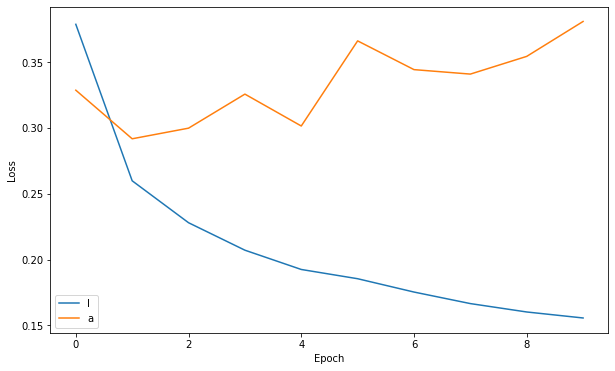

In [104]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend('labels')

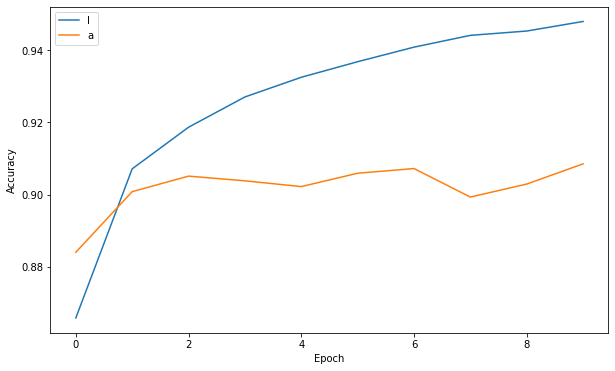

In [105]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

**Train the model using earlystop.**

In [106]:
from tensorflow.keras.callbacks import EarlyStopping

In [107]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [108]:
model.fit(X_train, Y_train, batch_size=28, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/10
2143/2143 [==============================] - 138s 64ms/step - loss: 0.1488 - accuracy: 0.9514 - val_loss: 0.4266 - val_accuracy: 0.8976
Epoch 2/10
2143/2143 [==============================] - 137s 64ms/step - loss: 0.1452 - accuracy: 0.9519 - val_loss: 0.4586 - val_accuracy: 0.8968
Epoch 3/10
2143/2143 [==============================] - 141s 66ms/step - loss: 0.1383 - accuracy: 0.9556 - val_loss: 0.4563 - val_accuracy: 0.9059


**Plot values of metrics you used in your model.**

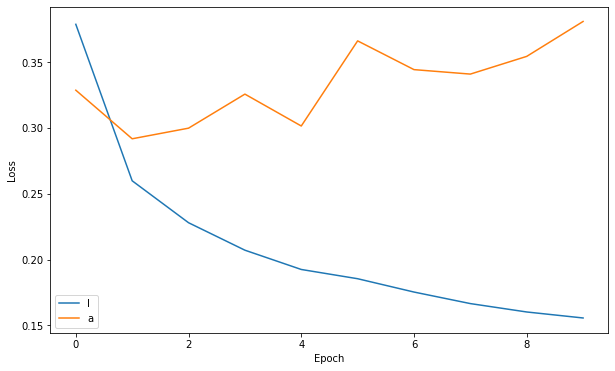

In [109]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend('labels')

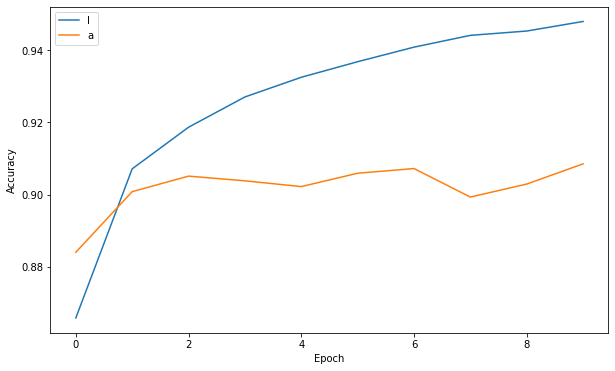

In [110]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

### Model Evaluation

**Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set.**

In [111]:
model.metrics_names

['loss', 'accuracy']

In [112]:
print(model.evaluate(X_test,Y_test,verbose=1))

313/313 [==============================] - 5s 16ms/step - loss: 0.4563 - accuracy: 0.9059
[0.45632967352867126, 0.9059000015258789]


In [113]:
from sklearn.metrics import classification_report,confusion_matrix

In [114]:
preds = model.predict(X_test)
preds

array([[5.9322408e-10, 1.7209703e-16, 4.3470703e-14, ..., 7.9253005e-05,
        4.1774048e-10, 9.9980944e-01],
       [8.9610906e-19, 0.0000000e+00, 1.0000000e+00, ..., 3.7213315e-33,
        0.0000000e+00, 1.7909484e-36],
       [2.9543169e-22, 1.0000000e+00, 5.3237739e-33, ..., 6.4815216e-27,
        4.9572426e-29, 6.2019997e-36],
       ...,
       [6.1103317e-25, 3.7926943e-37, 9.0830491e-29, ..., 2.1019057e-21,
        1.0000000e+00, 2.3326773e-35],
       [7.7593063e-15, 1.0000000e+00, 2.9040106e-24, ..., 7.3537962e-22,
        1.9326219e-24, 2.1346546e-22],
       [1.0235080e-04, 1.3566293e-07, 4.0748655e-03, ..., 2.6008688e-02,
        1.2308520e-03, 3.5508034e-05]], dtype=float32)

In [115]:
preds[0]

array([5.9322408e-10, 1.7209703e-16, 4.3470703e-14, 4.6409537e-15,
       1.6529471e-15, 1.1128286e-04, 3.6392456e-12, 7.9253005e-05,
       4.1774048e-10, 9.9980944e-01], dtype=float32)

In [116]:
predictions= np.argmax(preds, axis=1)

In [117]:
len(predictions)

10000

In [118]:
predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [119]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.83      0.88      0.85      1000
           3       0.92      0.90      0.91      1000
           4       0.86      0.83      0.85      1000
           5       0.98      0.97      0.98      1000
           6       0.76      0.73      0.74      1000
           7       0.94      0.98      0.96      1000
           8       0.97      0.98      0.97      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [120]:
print(confusion_matrix(y_test, predictions))

[[874   0  20  12   5   1  81   0   7   0]
 [  5 968   1  15   2   0   7   0   2   0]
 [ 13   1 884   6  58   0  36   0   2   0]
 [ 27   7  14 899  17   0  35   0   1   0]
 [  4   1  71  27 835   0  60   0   2   0]
 [  2   0   0   0   0 971   1  13   1  12]
 [113   1  73  15  58   0 726   0  14   0]
 [  0   0   0   0   0   9   0 979   0  12]
 [  1   2   6   3   1   2   5   4 976   0]
 [  0   0   0   0   0   6   1  46   0 947]]


# Prediction

In [121]:
my_number = X_test[5]

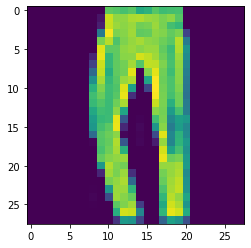

In [122]:
plt.imshow(my_number.reshape(28,28));

In [123]:
model.predict(my_number.reshape(1,28,28,1))

array([[6.8391965e-19, 1.0000000e+00, 3.0451776e-31, 1.5966416e-24,
        1.0013249e-22, 8.9300466e-32, 2.3545053e-23, 1.6729022e-24,
        1.2214121e-24, 1.6761041e-37]], dtype=float32)

In [124]:
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1) 

array([1], dtype=int64)

In [125]:
y_test[5]

1

# End of Assignment